In [16]:
#importing the librarys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv("sales_channel.csv")

In [18]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
df.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [21]:
df.shape

(200, 5)

In [22]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [23]:
#EDA Process
df.head()  #first 5 lines

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
df.tail() #last 5 lines

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [25]:
df.isnull().sum() # calulating the null values with out visuvalization

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

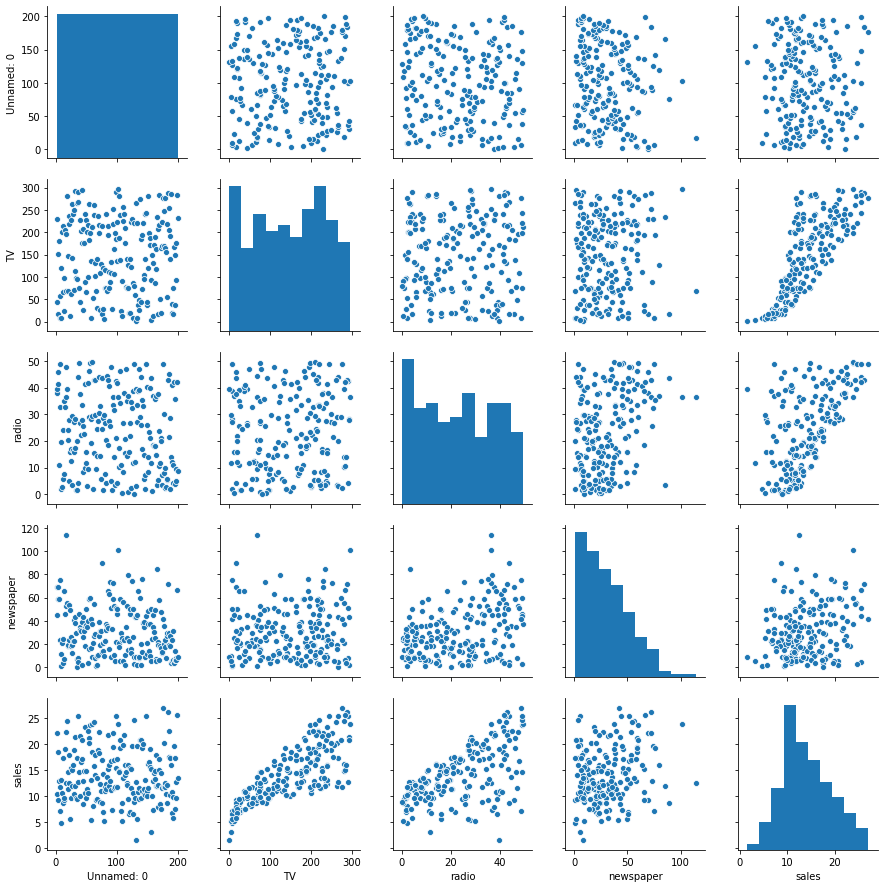

In [26]:
sns.pairplot(df) #highlinghting the dataset using the seaborn librery

In [27]:
df=pd.DataFrame(data=df)

In [28]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


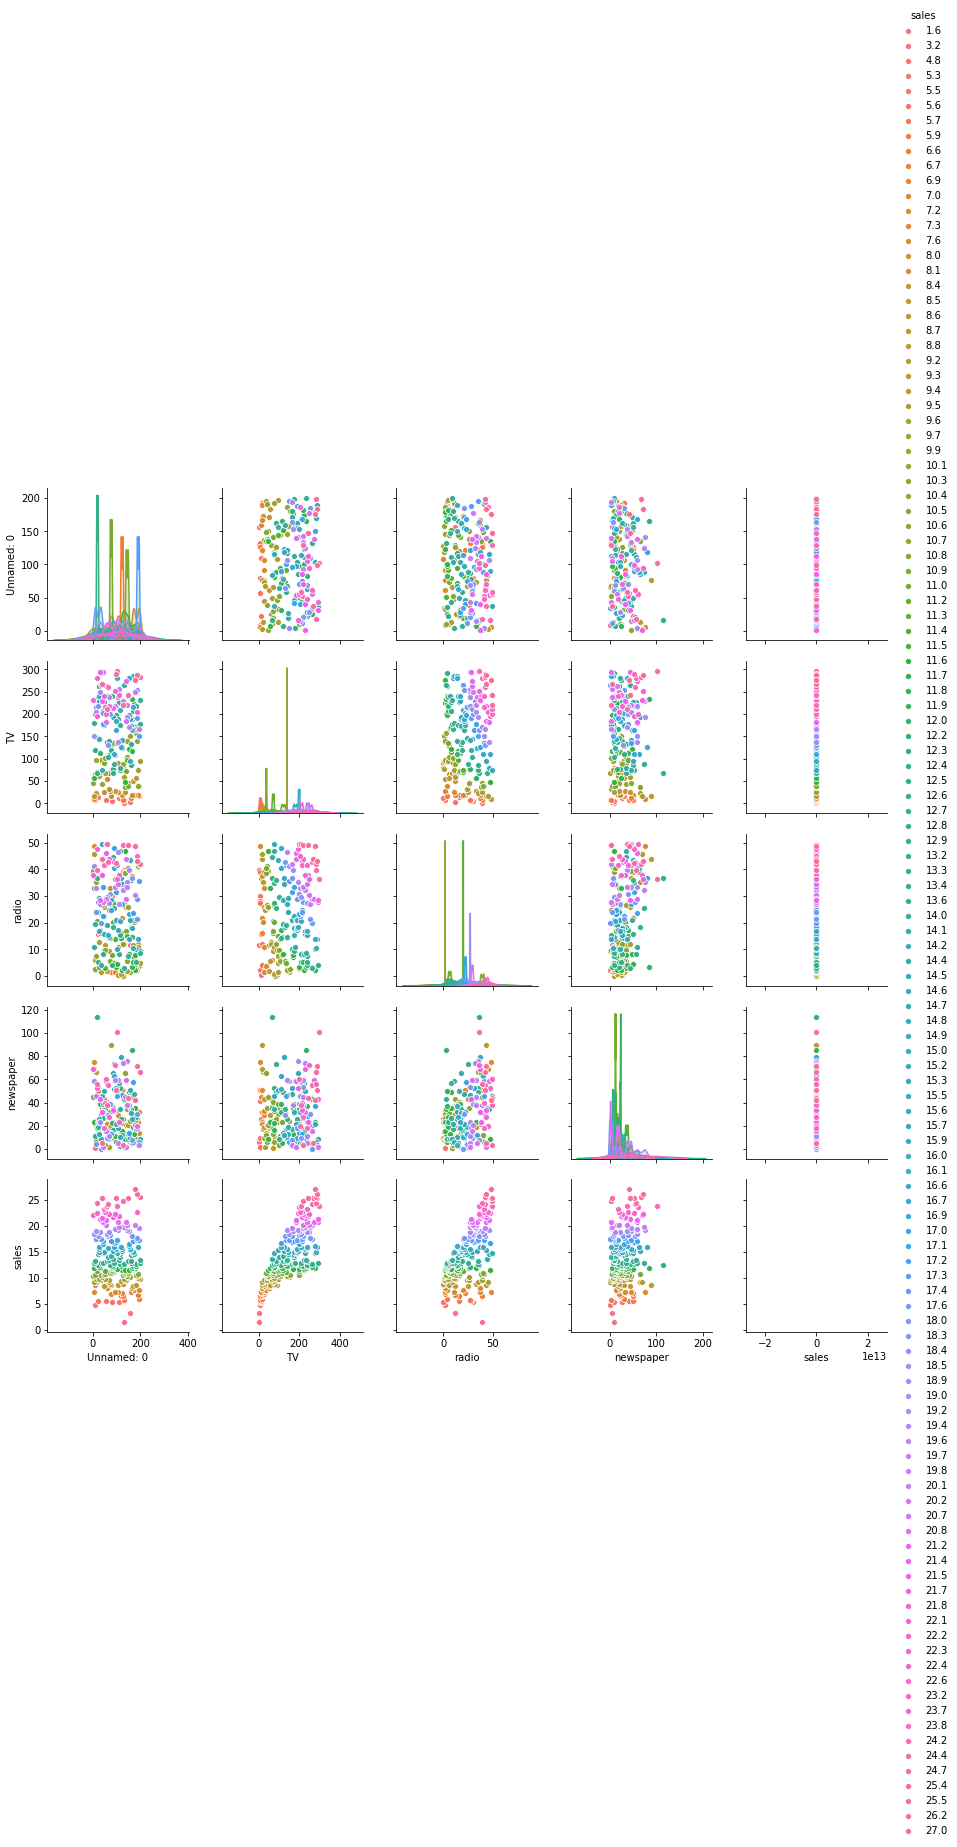

In [14]:
sns.pairplot(df, hue='sales')

In [29]:
#we are dropping the unnamed column because it same as serial number column and no need to predict this column, so we can drop this particular column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [30]:
#finding the correction

dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [31]:
#matrics representation

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
#finding the skewness of dataset

df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [34]:
#removing the skew ness of the dataset

for i in df.columns:

    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])

In [35]:
#again finding the skewness after using log

df.skew()
#data will be completly skewed.

TV          -0.069853
radio        0.094175
newspaper   -0.119007
sales        0.407571
dtype: float64

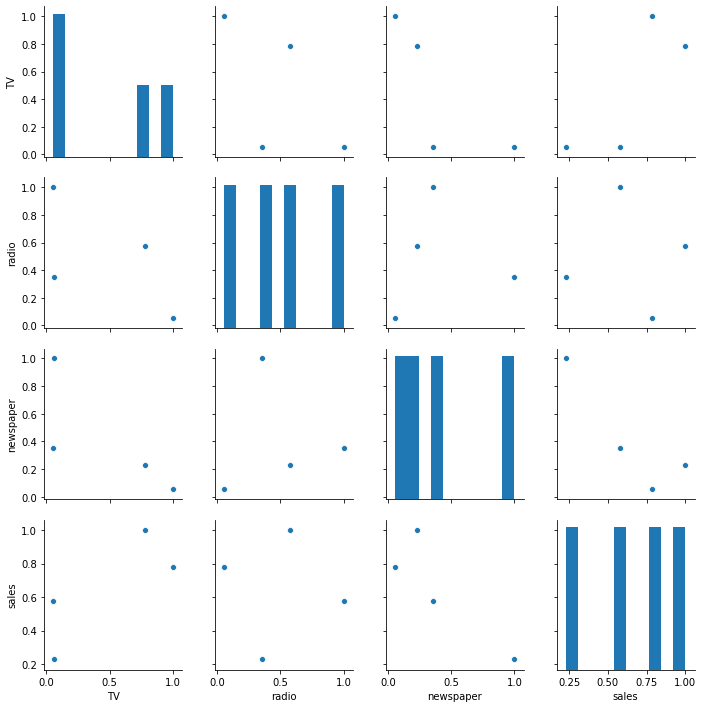

In [37]:
# finding the correlation of data using pairplot.

sns.pairplot(dfcor)

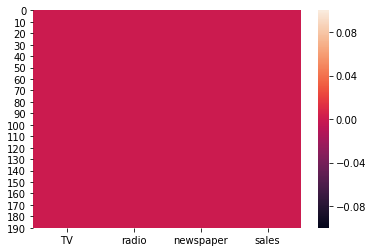

In [38]:
#visuvalize the null values 

sns.heatmap(df.isnull())

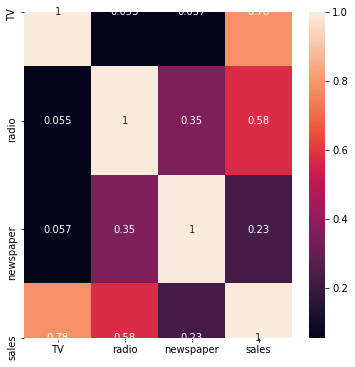

In [41]:
#visuvalize the correlation

plt.figure(figsize=(6,6))
sns.heatmap(dfcor, color='Blue', annot=True)

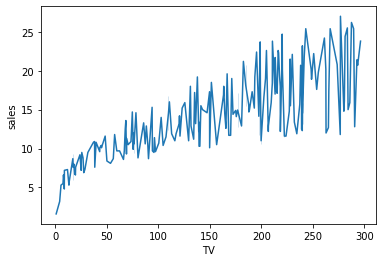

In [42]:
#lineplot representation

sns.lineplot(df["TV"],df["sales"])
plt.show()

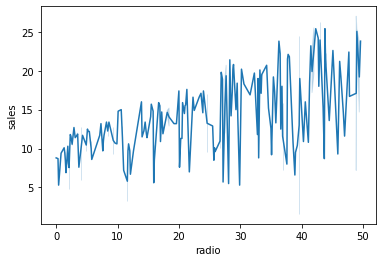

In [43]:
sns.lineplot(df["radio"],df["sales"])
plt.show()

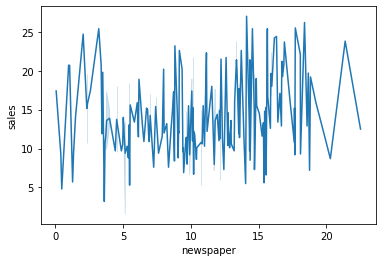

In [44]:
sns.lineplot(df["newspaper"],df["sales"])
plt.show()

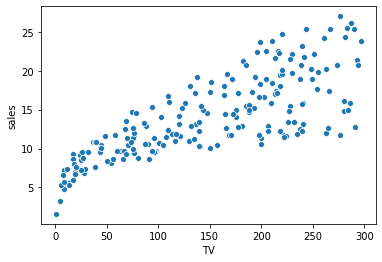

In [46]:
#by using the scatterplot.

sns.scatterplot(df["TV"],df["sales"])
plt.show()

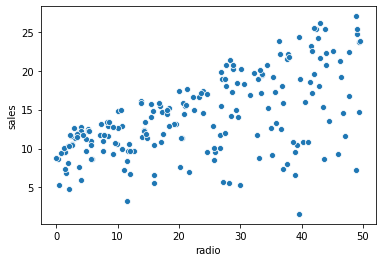

In [47]:
sns.scatterplot(df["radio"],df["sales"])
plt.show()

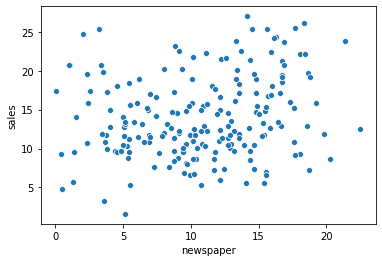

In [48]:
sns.scatterplot(df["newspaper"],df["sales"])
plt.show()

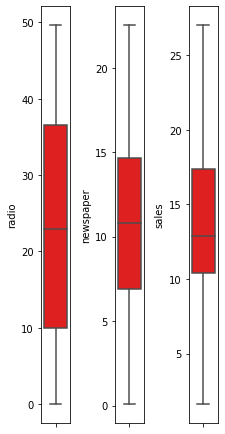

In [49]:
#by using the column plot

collist = df.columns.values
ncols=12
nrows=10

plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

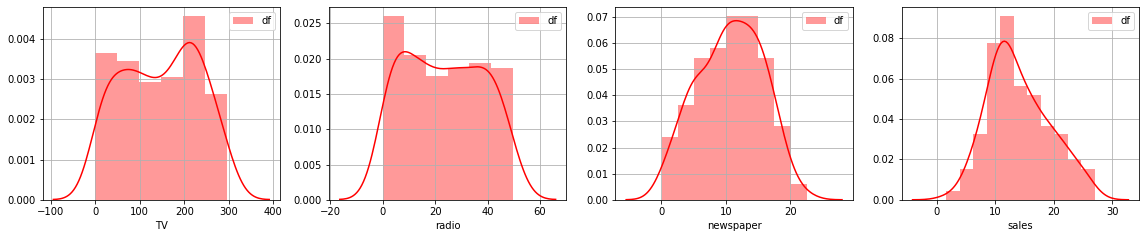

In [52]:
#plotting through distplot

plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='r',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

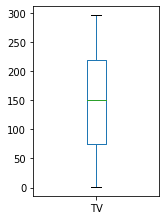

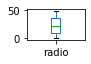

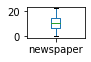

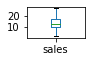

In [55]:
#box plot
#df.plot(kind='box',subplots=True,layout=(2,8))
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

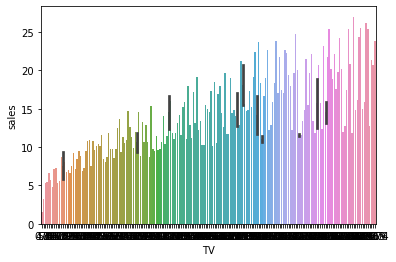

In [57]:
#barplot

sns.barplot(df["TV"], df["sales"])

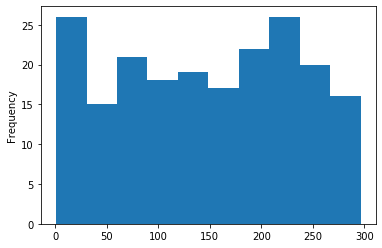

In [58]:
#hist

df['TV'].plot.hist()

In [63]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (200, 4)
df1.shape: (200, 4)
z value is: [[9.69852266e-01 9.81522472e-01 1.49112207e+00 1.55205313e+00]
 [1.19737623e+00 1.08280781e+00 8.04803535e-01 6.96046111e-01]
 [1.51615499e+00 1.52846331e+00 1.49356651e+00 9.07405869e-01]
 [5.20496822e-02 1.21785493e+00 1.21271236e+00 8.60330287e-01]
 [3.94182198e-01 8.41613655e-01 1.20993725e+00 2.15683025e-01]
 [1.61540845e+00 1.73103399e+00 1.62869309e+00 1.31091086e+00]
 [1.04557682e+00 6.43904671e-01 9.24856452e-02 4.27042783e-01]
 [3.13436589e-01 2.47406325e-01 8.62211506e-01 1.58039455e-01]
 [1.61657614e+00 1.42906863e+00 2.06149319e+00 1.77205942e+00]
 [6.16042873e-01 1.39530685e+00 2.17870072e-01 6.57617064e-01]
 [9.45155670e-01 1.17923146e+00 5.59342338e-02 1.04190753e+00]
 [7.90028350e-01 4.96973404e-02 1.63545878e+00 6.48970529e-01]
 [1.43908760e+00 7.99208859e-01 1.40892120e+00 9.26620392e-01]
 [5.78501712e-01 1.05768905e+00 1.26449956e+00 8.30547775e-01]
 [6.66253447e-01 6.50657027e-01 8.34791541e-01 9.56402904e-01]
 [5.

In [70]:
# seperating the x and y values

X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [71]:
df.shape

(200, 4)

In [72]:
X.shape

(200, 3)

In [73]:
Y.shape

(200,)

In [74]:
#applying the linear regression model

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [75]:
#splitting the data into training set and testing set

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

train_X.shape

(134, 3)

In [76]:
train_Y.shape

(134,)

In [77]:
test_X.shape

(66, 3)

In [78]:
test_Y.shape

(66,)

In [79]:
lg = LinearRegression()

In [80]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
lg.coef_

array([0.04646734, 0.1919704 , 0.01399021])

In [82]:
lg.intercept_

2.5438945597010747

In [83]:
lg.score(train_X,train_Y)

0.8984622891138303

In [84]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result :",pred)
print("actual result",test_Y)

Predicted result : [22.21601225 18.23337907  6.35414855  9.01272485 11.82836207  8.17843417
  4.30005866 17.28046036 16.42068162  8.84492523 14.10259911 12.59790263
 14.44626144 11.65553676 12.40760186 13.88178264 16.54933948 14.20130437
  3.38000081  6.94417398 13.27880667 14.37047866 14.69743205  6.42500555
  4.33478748 13.89031624 14.92360226 15.47524318 24.99547843 13.06865627
  7.81757451  9.31500226 21.46749557 18.31195673  5.54907125 12.46164687
 16.30235576  7.21713207 23.58446959  9.85218165 23.45012305 10.72975424
  7.32294479 18.59125223 11.48083956  9.58322974 13.52372974 21.50601135
 24.41983285 23.10903261 10.86004017 18.53544936  8.61145609  9.09096214
 19.62467462 12.60171635  7.98022239  9.8012051  20.85560874 14.90411843
 17.84549041 19.44829794  6.34603154 15.62408945 14.69785617 15.70503919]
actual result 128    24.7
20     18.0
117     9.4
125    10.6
173    11.7
       ... 
28     18.9
127     8.8
131    12.7
103    14.7
37     14.7
Name: sales, Length: 66, dtype:

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))
print('R2 Score of lg: %.2f' % r2_score(test_Y, pred))

error:
Mean absolute error: 1.428700777963581
Mean sqaured error: 3.136264059318714
Root mean squared error: 1.7709500442753077
R2 Score of lg: 0.89


In [88]:
#GradientBoostRegressor By using 

from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 550, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=550,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.9994407229416328
Mean squared error: 0.70
R2 Score: 0.98


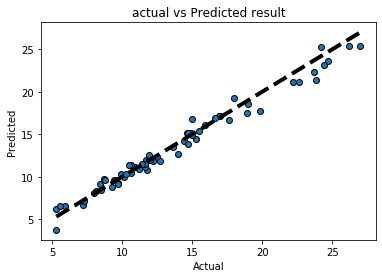

In [91]:
#Visualize the Prediction,
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("actual vs Predicted result")
plt.show()

In [92]:
#Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)


In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(35,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [95]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  35 is 0.790346014977037
r2 score corresponding to  36 is 0.9257608722405095
r2 score corresponding to  37 is 0.8840396731714055
r2 score corresponding to  38 is 0.8929840781564251
r2 score corresponding to  39 is 0.8791184490943509
r2 score corresponding to  40 is 0.7973918809410028
r2 score corresponding to  41 is 0.8824654747039933
r2 score corresponding to  42 is 0.8995504529227152
r2 score corresponding to  43 is 0.9281851439945669
r2 score corresponding to  44 is 0.8312102857265524
r2 score corresponding to  45 is 0.8955178754454114
r2 score corresponding to  46 is 0.8504232058985443
r2 score corresponding to  47 is 0.8860595686171289
r2 score corresponding to  48 is 0.9196993209098391
r2 score corresponding to  49 is 0.8245737013871064
r2 score corresponding to  50 is 0.8469420059000985
r2 score corresponding to  51 is 0.906051323789362
r2 score corresponding to  52 is 0.8813141621096152
r2 score corresponding to  53 is 0.9256536528607923
r2 score corre

In [96]:
##KNN Model
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of knn: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear knn: %.2f' % r2_score(test_Y, predicted))

Mean squared error of knn: 0.75
R2 Score of linear knn: 0.97


In [97]:
#grid_search to find optimal value of n_neighbors for KNN Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,33)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 2}

In [146]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=2)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  35 is 0.9509342603807779
r2 score corresponding to  36 is 0.9463749641568033
r2 score corresponding to  37 is 0.9397049687585869
r2 score corresponding to  38 is 0.9526356648125293
r2 score corresponding to  39 is 0.9668271660959168
r2 score corresponding to  40 is 0.94971566406862
r2 score corresponding to  41 is 0.9080832624531765
r2 score corresponding to  42 is 0.9713000044552912
r2 score corresponding to  43 is 0.9619671558805981
r2 score corresponding to  44 is 0.9073419980186428
r2 score corresponding to  45 is 0.9489392074067069
r2 score corresponding to  46 is 0.9516099559413724
r2 score corresponding to  47 is 0.9673665586720094
r2 score corresponding to  48 is 0.9709405616117014
r2 score corresponding to  49 is 0.9469773102031322
r2 score corresponding to  50 is 0.9343125290817625
r2 score corresponding to  51 is 0.9451993146717332
r2 score corresponding to  52 is 0.9651348421452705
r2 score corresponding to  53 is 0.968232402903155
r2 score corres

In [145]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print("---------\n")
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.8873995161539469
std deviation in r2 scorefor Linear Regression: 0.03979058491287945
---------

Mean r2 score for KNN Regression:  0.9549141441477745
std deviation in r2 score for KNN Regression: 0.01031868448047743


In [142]:
#Boosting Linear Regression and KNN Model

from sklearn.ensemble import AdaBoostRegressor
ada1_reg=AdaBoostRegressor()
add1_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada1_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada1_reg,X,Y,cv=5,scoring="r2").std())

print("---------------------\n")

ada2_reg=AdaBoostRegressor()
add2_reg=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada2_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada2_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9533539028769104
std deviation in r2 score for ada boosting Regression:  0.01279741244377582
---------------------

Mean r2 score for ada boosting Regression:  0.9552414883302298
std deviation in r2 score for ada boosting Regression:  0.01291243312125511


In [143]:
#check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1]}
clf = GridSearchCV(lsreg,parameters,cv=12)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.1}

In [144]:
#Lets use cross val score with Lasso
lasso_grs1=Lasso(alpha = 0.1)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs1,X,Y,cv=5,scoring="r2").std())


print("---------------\n")

#Boosting Lasso Regressor
ada3_reg=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada3_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada3_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.8878415132571196
std deviation in r2 score for Lasso Regression:  0.03920330037798978
---------------

Mean r2 score for ada boosting Regression:  0.9536653751438301
std deviation in r2 score for ada boosting Regression:  0.01040352291273914


In [139]:
#Support Vector Regression

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR(kernel = "linear")
svr.fit(train_X,train_Y)
svr.score(train_X,train_Y)
y_pred1=svr.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 3.56
R2 Score of linear svc: 0.86


In [140]:
#Grid Search CV in Support Vector Regressor
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.55, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 4)
grs.fit(X,Y)
grs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=linear .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.905, total=   1.1s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=linear .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.844, total=   3.4s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=linear .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.901, total=   1.6s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=rbf ....................
[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.074, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=rbf ....................
[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=rbf, score=0.025, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=rbf ....................
[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=rbf, score=0.049, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=poly ...................
[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.124, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=poly ...................
[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.030, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=1e-07, kernel=poly ...................
[CV]  C=1.55, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.008, total=   0.0s
[CV] C=1.55

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s


[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=linear, score=0.905, total=   1.1s
[CV] C=1.55, epsilon=0.1, gamma=0.0001, kernel=linear ................
[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=linear, score=0.844, total=   3.4s
[CV] C=1.55, epsilon=0.1, gamma=0.0001, kernel=linear ................
[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=linear, score=0.901, total=   1.6s
[CV] C=1.55, epsilon=0.1, gamma=0.0001, kernel=rbf ...................
[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=0.0001, kernel=rbf ...................
[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=0.0001, kernel=rbf ...................
[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=1.55, epsilon=0.1, gamma=0.0001, kernel=poly ..................
[CV]  C=1.55, epsilon=0.1, gamma=0.0001, kernel=poly, score=0.896, total=   0.0s
[CV]

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  3.6min finished


{'C': 10, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [141]:
svr_grs=SVR(C=10, epsilon=0.3, gamma=0.0001, kernel='rbf')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9879595800641419
std deviation in r2 score for ada boosting Regression:  0.01054325956753923


In [147]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor

In [148]:
ada_reg=AdaBoostRegressor()
add_reg=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9517286541686655
Standard deviation in r2 score for ada boosting Regression:  0.011843602902186471


In [149]:
#Decision tree Regessor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [150]:
#Decision Tree Regressor Using GridSearchCV
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.9263624249762629
R-Squaredon test dataset=0.9726454040353391


In [153]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [154]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.8221105647986653
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [156]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
ada5_reg5=AdaBoostRegressor()
add5_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add5_reg5,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add5_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9305873510586882
std deviation in r2 score for ada boosting Regression:  0.020166321785099372


In [196]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.93
R2 Score : 0.96


In [198]:
#Random Forest Regressor with GridSearchCV
rf_gs = RandomForestRegressor(n_estimators=100)
n_features = X.shape[1]
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=30, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 3, 'max_depth': 19}


In [199]:
rf_gss = RandomForestRegressor(max_features = 3, max_depth = 19)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.973030168754139
std deviation in r2 score for ada boosting Regression:  0.012375685428159585


In [200]:
#Boosting RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
add_reg=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9730464992376138
std deviation in r2 score for ada boosting Regression:  0.007995680071328523


In [201]:
#we are finding all models that give high accuracy scores ,among them am choosing Randam forest regrecussor because Here r2 score is (0.97) and standard deviation is low (0.01) 
#So am saving this model as best.

In [202]:
df=pd.DataFrame(pred)
df.to_csv('saleschannelpredi.csv')

In [203]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(add_reg,'sales_channel.pkl')

['sales_channel.pkl']